<a href="https://colab.research.google.com/github/haaaram/MS-AIschool/blob/main/04.DL/Keras_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

In [ ]:
# 훈련 데이터와 테스트 데이터의 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 라벨 데이터를 카테고리 데이터로 전환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 81ms/step - loss: 2.7608 - accuracy: 0.4964 - val_loss: 1.8764 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 61ms/step - loss: 1.5859 - accuracy: 0.6802 - val_loss: 1.4015 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 2s 116ms/step - loss: 1.2077 - accuracy: 0.7369 - val_loss: 1.2009 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 1s 84ms/step - loss: 0.9780 - accuracy: 0.7913 - val_loss: 1.0858 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.8074 - accuracy: 0.8327 - val_loss: 1.0022 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.6711 - accuracy: 0.8582 - val_loss: 0.9576 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5568 - accuracy: 0.8842 - val_loss: 0.9120 - val_accuracy: 0.8080
Epoch 8/20
1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

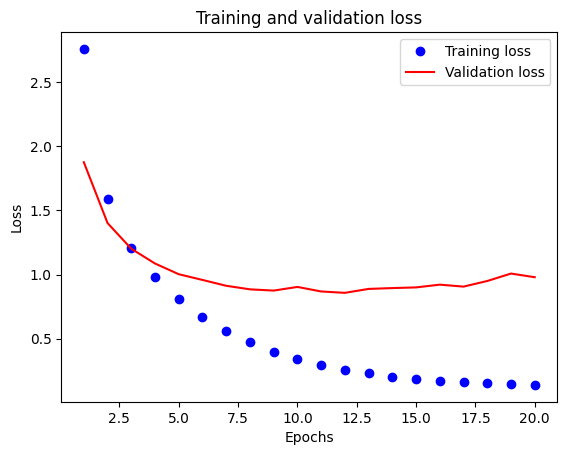

In [ ]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

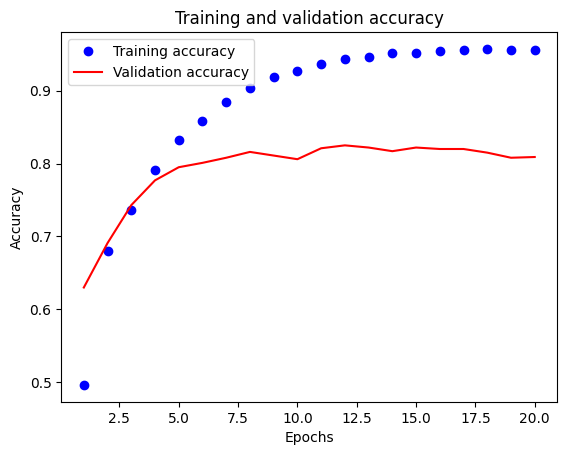

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 검증된 결과로 다시 학습
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 2s 77ms/step - loss: 2.8990 - accuracy: 0.4723 - val_loss: 1.9938 - val_accuracy: 0.6180
Epoch 2/10
16/16 [==============================] - 1s 56ms/step - loss: 1.6252 - accuracy: 0.6755 - val_loss: 1.4044 - val_accuracy: 0.6920
Epoch 3/10
16/16 [==============================] - 1s 56ms/step - loss: 1.1983 - accuracy: 0.7405 - val_loss: 1.2102 - val_accuracy: 0.7310
Epoch 4/10
16/16 [==============================] - 1s 81ms/step - loss: 0.9717 - accuracy: 0.7868 - val_loss: 1.0759 - val_accuracy: 0.7630
Epoch 5/10
16/16 [==============================] - 2s 97ms/step - loss: 0.8031 - accuracy: 0.8262 - val_loss: 1.0117 - val_accuracy: 0.7800
Epoch 6/10
16/16 [==============================] - 1s 69ms/step - loss: 0.6741 - accuracy: 0.8549 - val_loss: 0.9628 - val_accuracy: 0.7950
Epoch 7/10
16/16 [==============================] - 1s 55ms/step - loss: 0.5596 - accuracy: 0.8797 - val_loss: 0.9057 - val_accuracy: 0.8050
Epoch 8/10
16